In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data = data.fillna('') # replace missing values with strings for easier text processing
data.head()

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop
3,,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,,,Desktop
4,https://watsi.org/fund-treatments,2016-02-14 19:30:08,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,ANDREE N,watsi.org,,Desktop


In [3]:
data['platform'].value_counts()

Desktop       3934
iPhone         515
Android        388
iPad           154
Opera Mini       7
IEMobile         1
BlackBerry       1
Name: platform, dtype: int64

In [17]:
data['new'] = 'overwritten'
data[:3]

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,new
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop,overwritten
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,overwritten
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,overwritten


In [21]:
# del data['new']
data[:3]

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop


In [5]:
mobile = ['iPhone', 'Android', 'iPad', 'Opera Mini', 'IEMobile', 'BlackBerry']
print('iPad' in mobile)
print('Desktop' in mobile)
print('Monty Python' in mobile)

True
False
False


In [6]:
if 'Opera Mini' in mobile:
    print('great success.')

great success.


In [7]:
if 'The Marriage of Figaro' in mobile:
    print('great success.')
else:
    print('that is immobile.')

that is immobile.


In [8]:
if 'The Marriage of Figaro' in mobile:
    print('great success.')
elif 'Fake' in mobile:
    print('Cambada de fakes.')
else:
    print('that is immobile.')

that is immobile.


In [9]:
def filter_desktop_mobile(platform):
    if platform in mobile:
        return 'Mobile'
    elif platform == 'Desktop':
        return 'Desktop'
    else:
        return 'Not Known'
    
what_is_android = filter_desktop_mobile('Android')
print(what_is_android)

Mobile


In [10]:
data['platform_type'] = data['platform'].apply(filter_desktop_mobile)
data[['platform', 'platform_type']][14:18]

,platform,platform_type
14,Desktop,Desktop
15,Android,Mobile
16,iPhone,Mobile
17,Desktop,Desktop


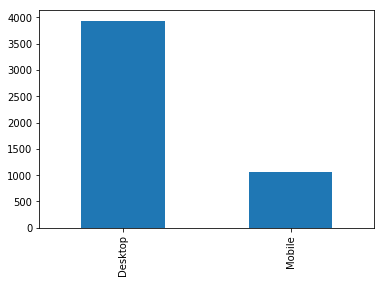

In [11]:
data['platform_type'].value_counts().plot(kind='bar')

In [12]:
data['referrer_length'] = data['referrer'].apply(len)
data[['referrer', 'referrer_length']].head()

,referrer,referrer_length
0,https://www.google.com/,23
1,https://themeteorchef.com/snippets/making-use-...,63
2,https://watsi.org/,18
3,,0
4,https://watsi.org/fund-treatments,33


In [13]:
def get_domain_type(domain):
    if '.org' in domain:
        return 'organization'
    elif '.com' in domain:
        return 'company'
    else:
        return 'other'

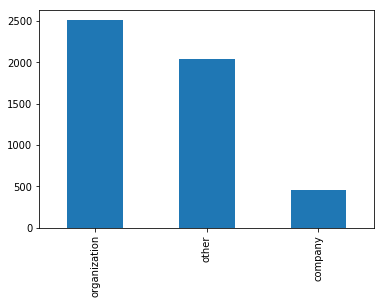

In [15]:
data['tld'] = data['referrer_domain'].apply(get_domain_type)
data['tld'].value_counts().plot(kind='bar')

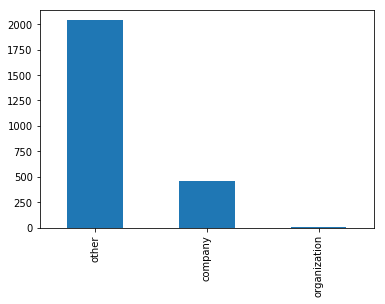

In [16]:
non_watsi = data[data['referrer_domain'] != 'watsi.org']
non_watsi['tld'].value_counts().plot(kind='bar')